### Importing Libraries

We import all the necessary libraries required for data handling, visualization, preprocessing, and machine learning model building.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Vehicle Dataset

We load the vehicle dataset into a pandas DataFrame to begin our analysis and model-building process.


In [3]:
vehicle_data = pd.read_csv('/Users/js/Desktop/Vehicle Price Prediction/dataset.csv')

### Exploratory Data Analysis

We perform exploratory data analysis (EDA) to understand the structure of the dataset, identify patterns, and detect any inconsistencies or anomalies.

---

#### Defining the Functions

We define reusable functions to visualize distributions, check feature relationships, and analyze categorical and numerical features effectively.



#### Function for Basic Dataset Information

A helper function to display the structure of the dataset, including data types, non-null counts, and the first few rows for an initial understanding.


In [4]:
def show_basic_info(df):
    """
    Display basic information about the dataset.
    """
    print("\n--- Dataset Info ---")
    print(df.info())
    print("\n--- First 5 Rows ---")
    print(df.head())

#### Function to Check Missing Values

This function calculates and returns the percentage of missing values for each column, helping to identify incomplete data that may need handling.


In [5]:
def check_missing_values(df):
    """
    Calculate and display percentage of missing values per column.
    """
    missing = (df.isnull().sum() / len(df)) * 100
    missing = missing[missing > 0].sort_values(ascending=False)
    return missing


#### Function to Plot Numerical Distributions

This function visualizes the distributions of numerical features using histograms, helping to identify the spread, skewness, and presence of outliers in the data.


In [6]:
def plot_numerical_distributions(df, numerical_features):
    """
    Plot histograms for numerical features to check their distributions.
    """
    plt.figure(figsize=(30, 20))
    for i, feature in enumerate(numerical_features):
        plt.subplot(2, (len(numerical_features) + 1) // 2, i + 1)
        sns.histplot(df[feature], kde=True, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Define numerical features
numerical_features = ['price', 'year', 'mileage', 'cylinders', 'doors']

#### Function to Plot Categorical Values

This function generates bar charts for categorical features to visualize the distribution of unique values and identify the most common categories.


In [7]:
def plot_categorical_counts(df, categorical_features):
    """
    Plot bar charts for categorical features to check value counts.
    """
    plt.figure(figsize=(30, 20))
    for i, feature in enumerate(categorical_features):
        plt.subplot(3, (len(categorical_features) + 2) // 3, i + 1)
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Count of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


# Define categorical features
categorical_features = ['make', 'fuel', 'transmission', 'body', 'drivetrain']

### Calling the Functions

---

#### Basic Dataset Information

We call the `show_basic_info()` function to display the structure of the dataset, including the number of entries, columns, data types, and non-null values.


In [8]:
show_basic_info(vehicle_data)


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(

#### Percentage of Missing Values

We use the `check_missing_values()` function to calculate the percentage of missing data in each column, allowing us to identify which features may require cleaning or imputation.


In [9]:
missing_values = check_missing_values(vehicle_data)
print("\n--- Missing Values (%): ---")
print(missing_values)


--- Missing Values (%): ---
cylinders         10.479042
description        5.588822
interior_color     3.792415
mileage            3.393214
price              2.295409
fuel               0.698603
doors              0.698603
exterior_color     0.499002
body               0.299401
engine             0.199601
transmission       0.199601
trim               0.099800
dtype: float64


#### Numerical Data Distributions

We use the `plot_numerical_distributions()` function to visualize the distribution of numerical features, which helps in understanding data spread, skewness, and detecting potential outliers.


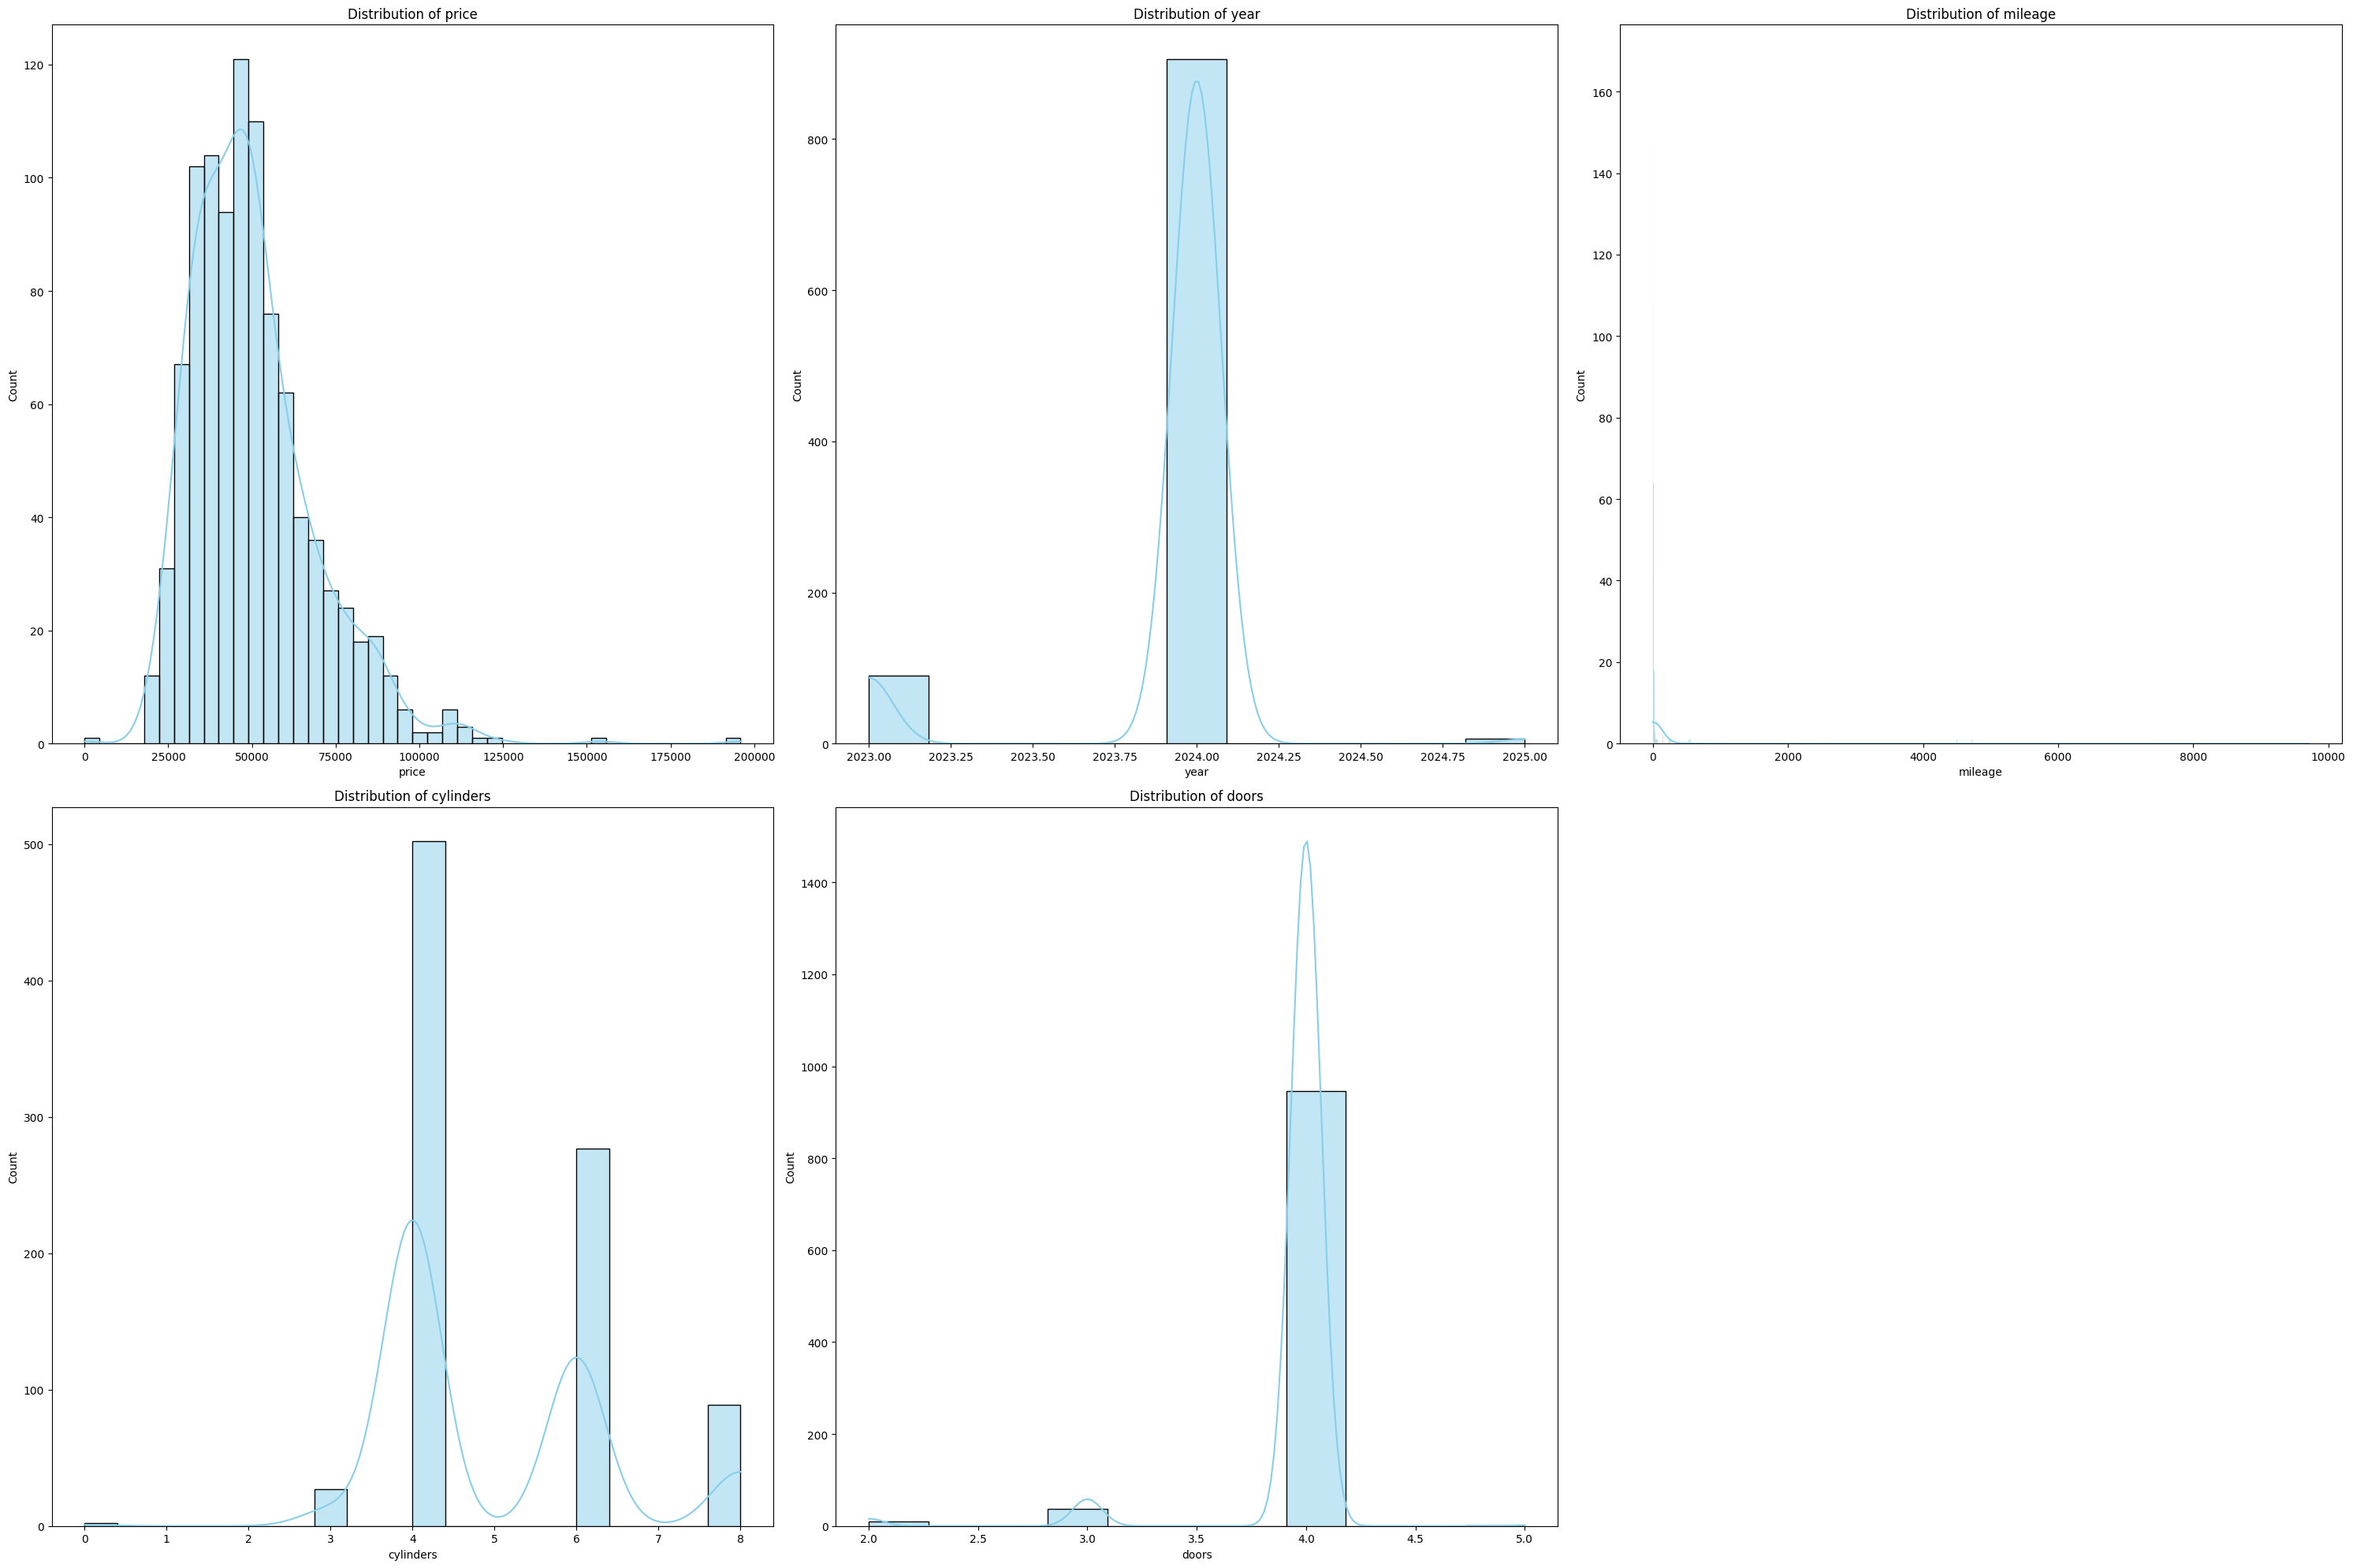

In [10]:
plot_numerical_distributions(vehicle_data, numerical_features)

#### Categorical Data Distributions

We use the `plot_categorical_counts()` function to visualize the frequency distribution of categorical features, helping us understand the most common categories in the dataset.


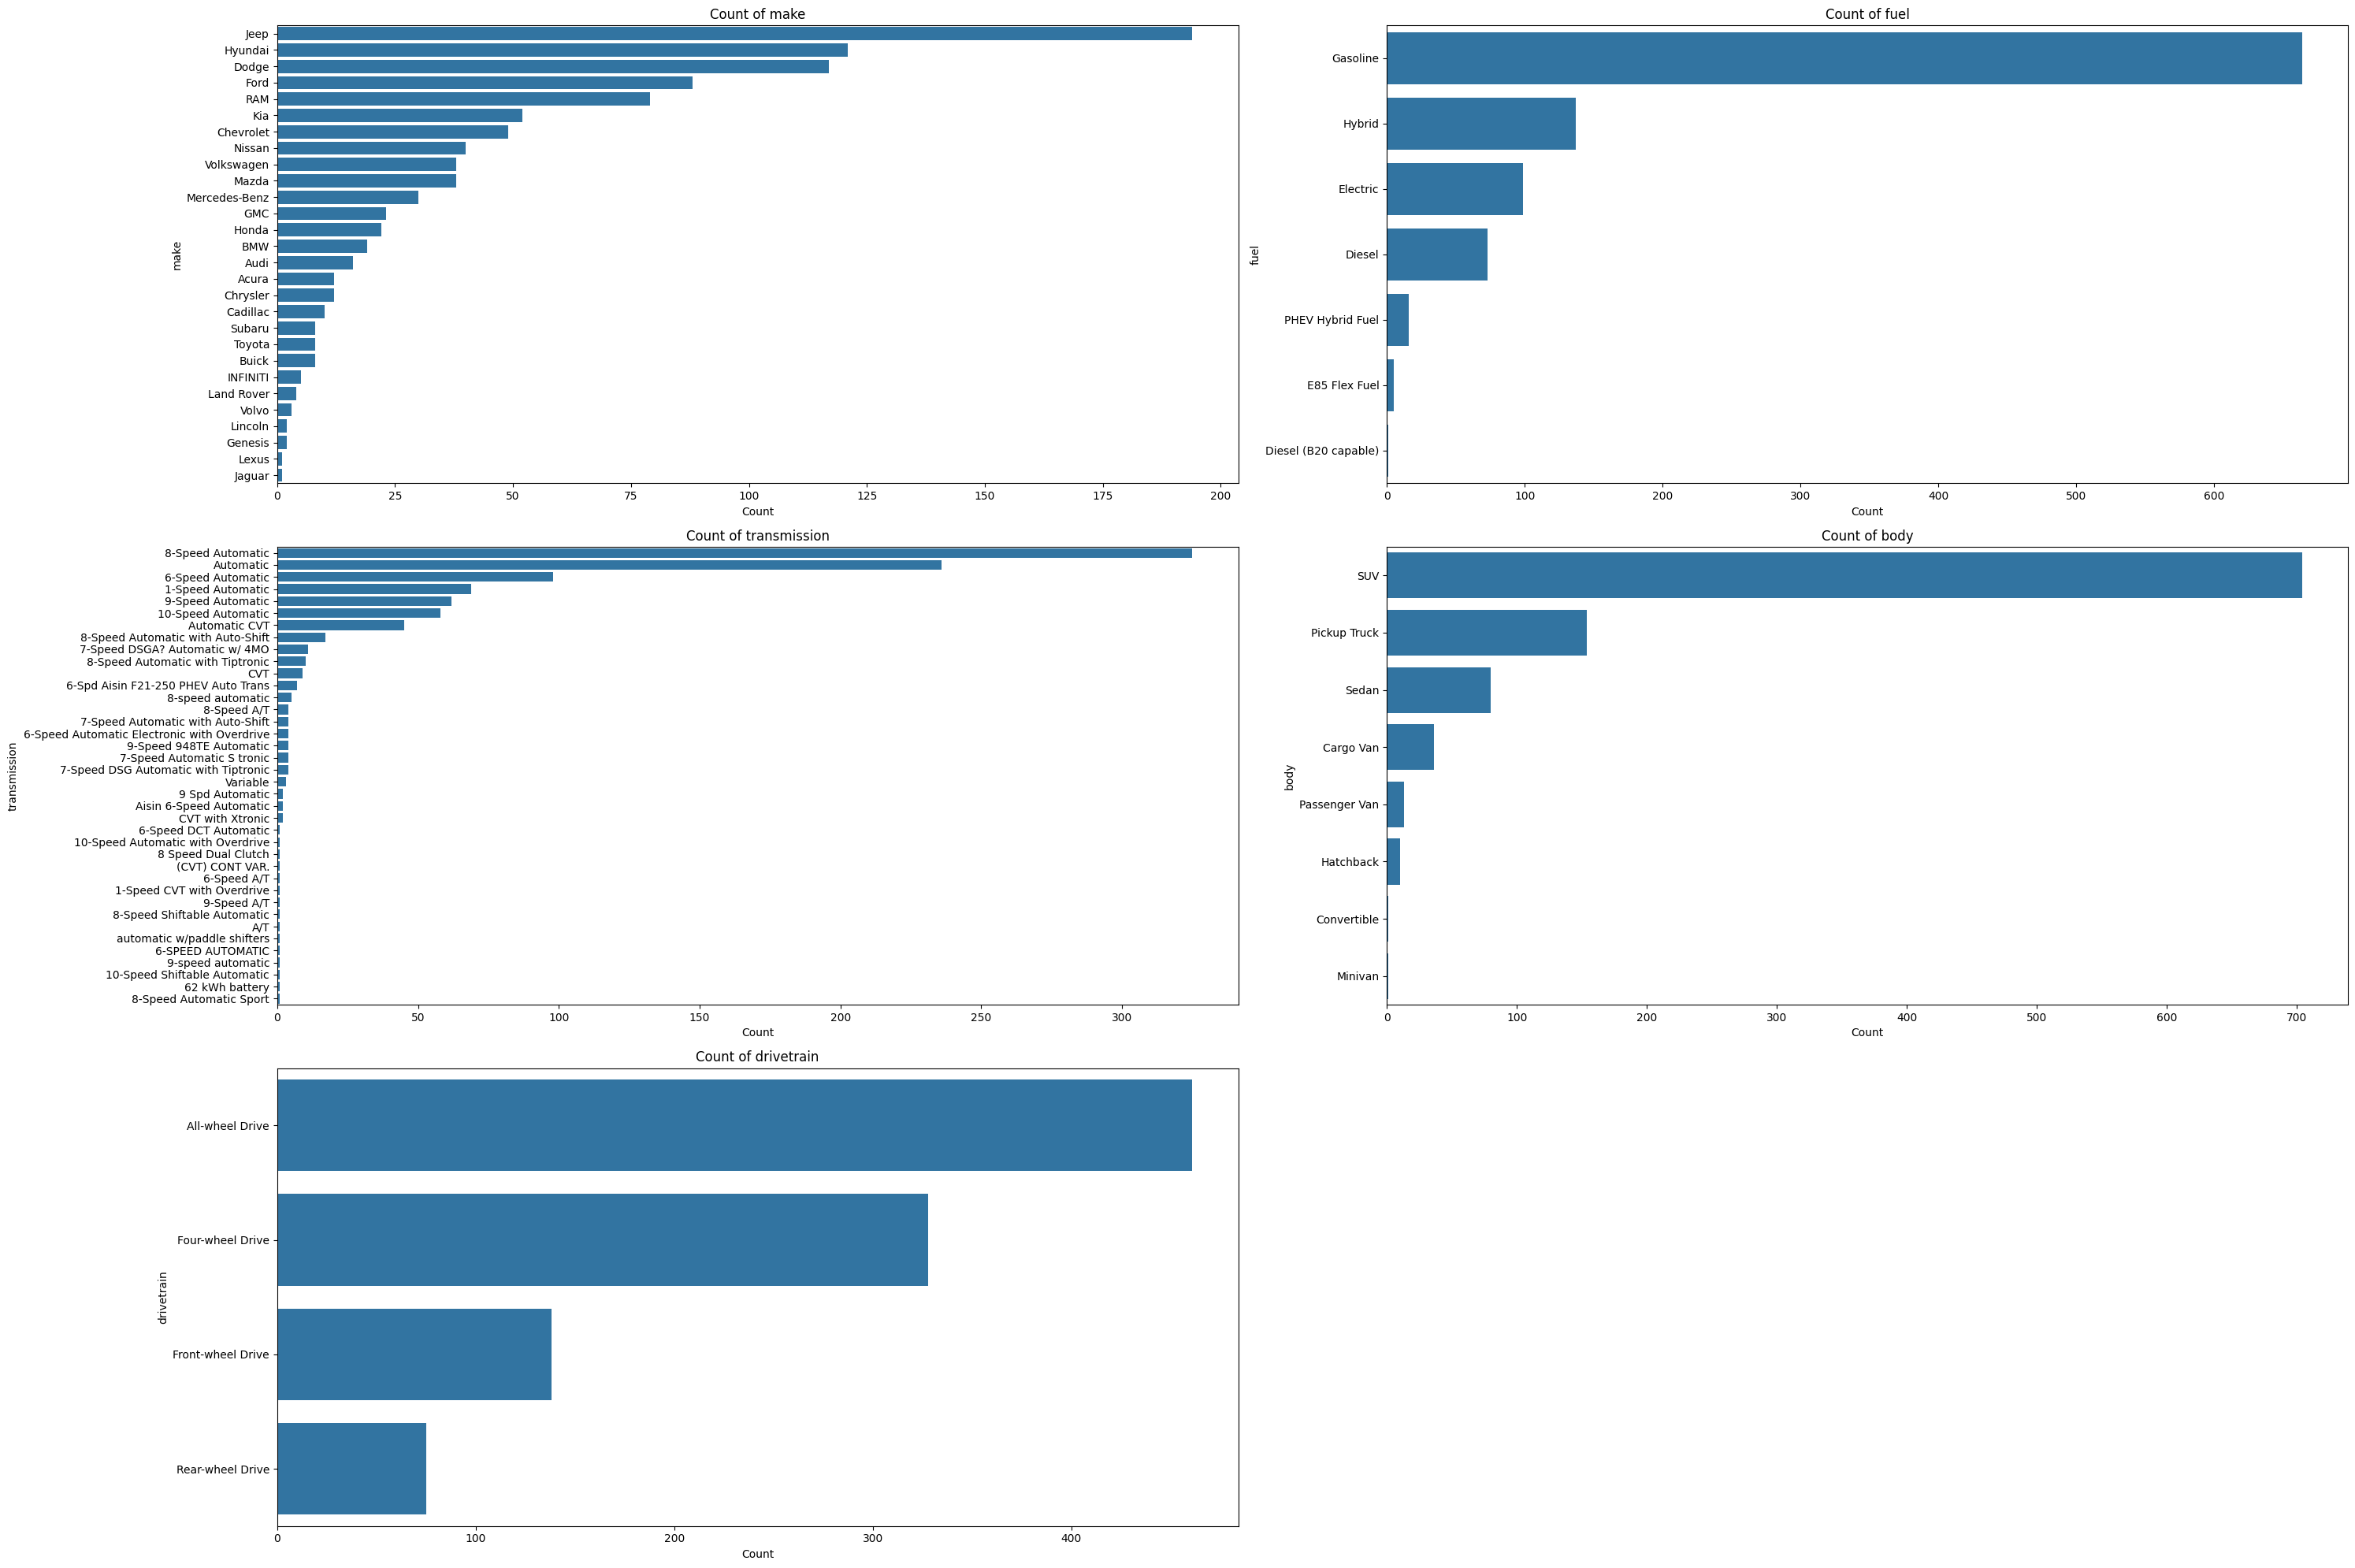

In [11]:
plot_categorical_counts(vehicle_data, categorical_features)

### Data Preprocessing
--- 

#### Refining the Dataset

We select only the relevant features from the original dataset that contribute to predicting the target variable, `price`, and create a refined dataset for further processing.


In [12]:
selected_features = [
    'make', 
    'model', 
    'year', 
    'cylinders', 
    'fuel', 
    'mileage', 
    'transmission', 
    'body', 
    'doors', 
    'drivetrain', 
    'price'
]

# Create refined dataset
refined_data = vehicle_data[selected_features].copy()
print(f"Refined dataset shape: {refined_data.shape}")
refined_data.head()


Refined dataset shape: (1002, 11)


,make,model,year,cylinders,fuel,mileage,transmission,body,doors,drivetrain,price
0,Jeep,Wagoneer,2024,6.0,Gasoline,10.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,74600.0
1,Jeep,Grand Cherokee,2024,6.0,Gasoline,1.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,50170.0
2,GMC,Yukon XL,2024,8.0,Gasoline,0.0,Automatic,SUV,4.0,Four-wheel Drive,96410.0
3,Dodge,Durango,2023,8.0,Gasoline,32.0,8-Speed Automatic,SUV,4.0,All-wheel Drive,46835.0
4,RAM,3500,2024,6.0,Diesel,10.0,6-Speed Automatic,Pickup Truck,4.0,Four-wheel Drive,81663.0


#### Finding the Outliers in the Dataset

We detect outliers in the numerical features using the Interquartile Range (IQR) method. This helps in identifying extreme values that may negatively impact model performance.


In [13]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

numerical_features = ['price', 'mileage', 'year', 'cylinders', 'doors']
for feature in numerical_features:
    outliers = detect_outliers_iqr(refined_data, feature)
    print(f"{feature} outliers detected: {len(outliers)}")


price outliers detected: 26
mileage outliers detected: 102
year outliers detected: 96
cylinders outliers detected: 2
doors outliers detected: 48


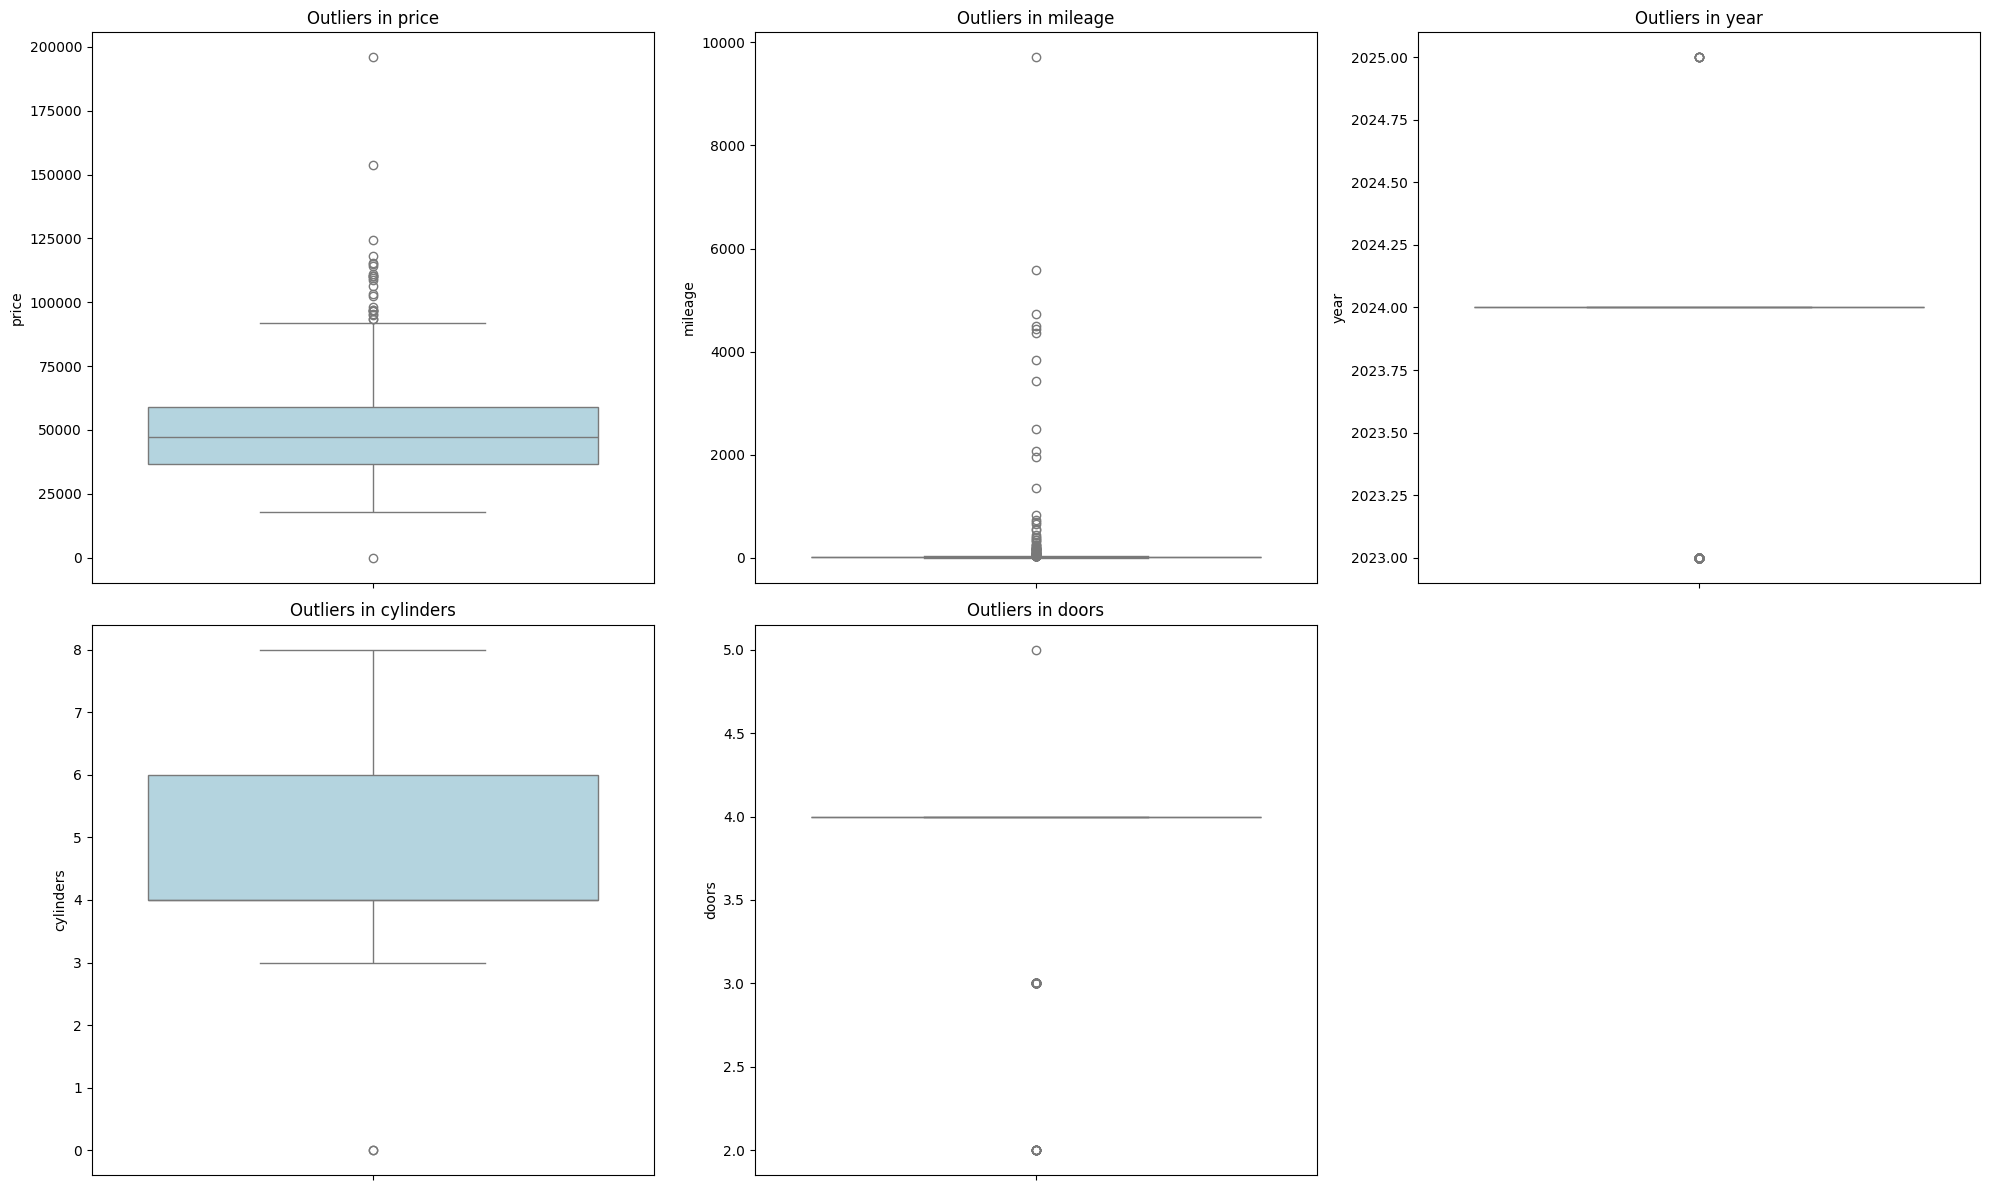

In [14]:
def plot_outliers(df, numerical_features):
    plt.figure(figsize=(20, 12))
    for i, feature in enumerate(numerical_features):
        plt.subplot(2, (len(numerical_features) + 1) // 2, i + 1)
        sns.boxplot(y=df[feature], color='lightblue')
        plt.title(f'Outliers in {feature}')
    plt.tight_layout()
    plt.show()

plot_outliers(refined_data, numerical_features)


#### Removing the Outliers

We remove outliers detected in numerical features using the IQR method to ensure that extreme values do not negatively impact the training of the machine learning models.


In [15]:
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        print(f"After removing {feature} outliers, remaining rows: {len(df)}")
    return df

refined_data = remove_outliers_iqr(refined_data, numerical_features)


After removing price outliers, remaining rows: 953
After removing mileage outliers, remaining rows: 827
After removing year outliers, remaining rows: 766
After removing cylinders outliers, remaining rows: 690
After removing doors outliers, remaining rows: 657


#### Missing Values in the Dataset

We visualize and identify any remaining missing values in the refined dataset to decide on appropriate handling strategies before further processing.


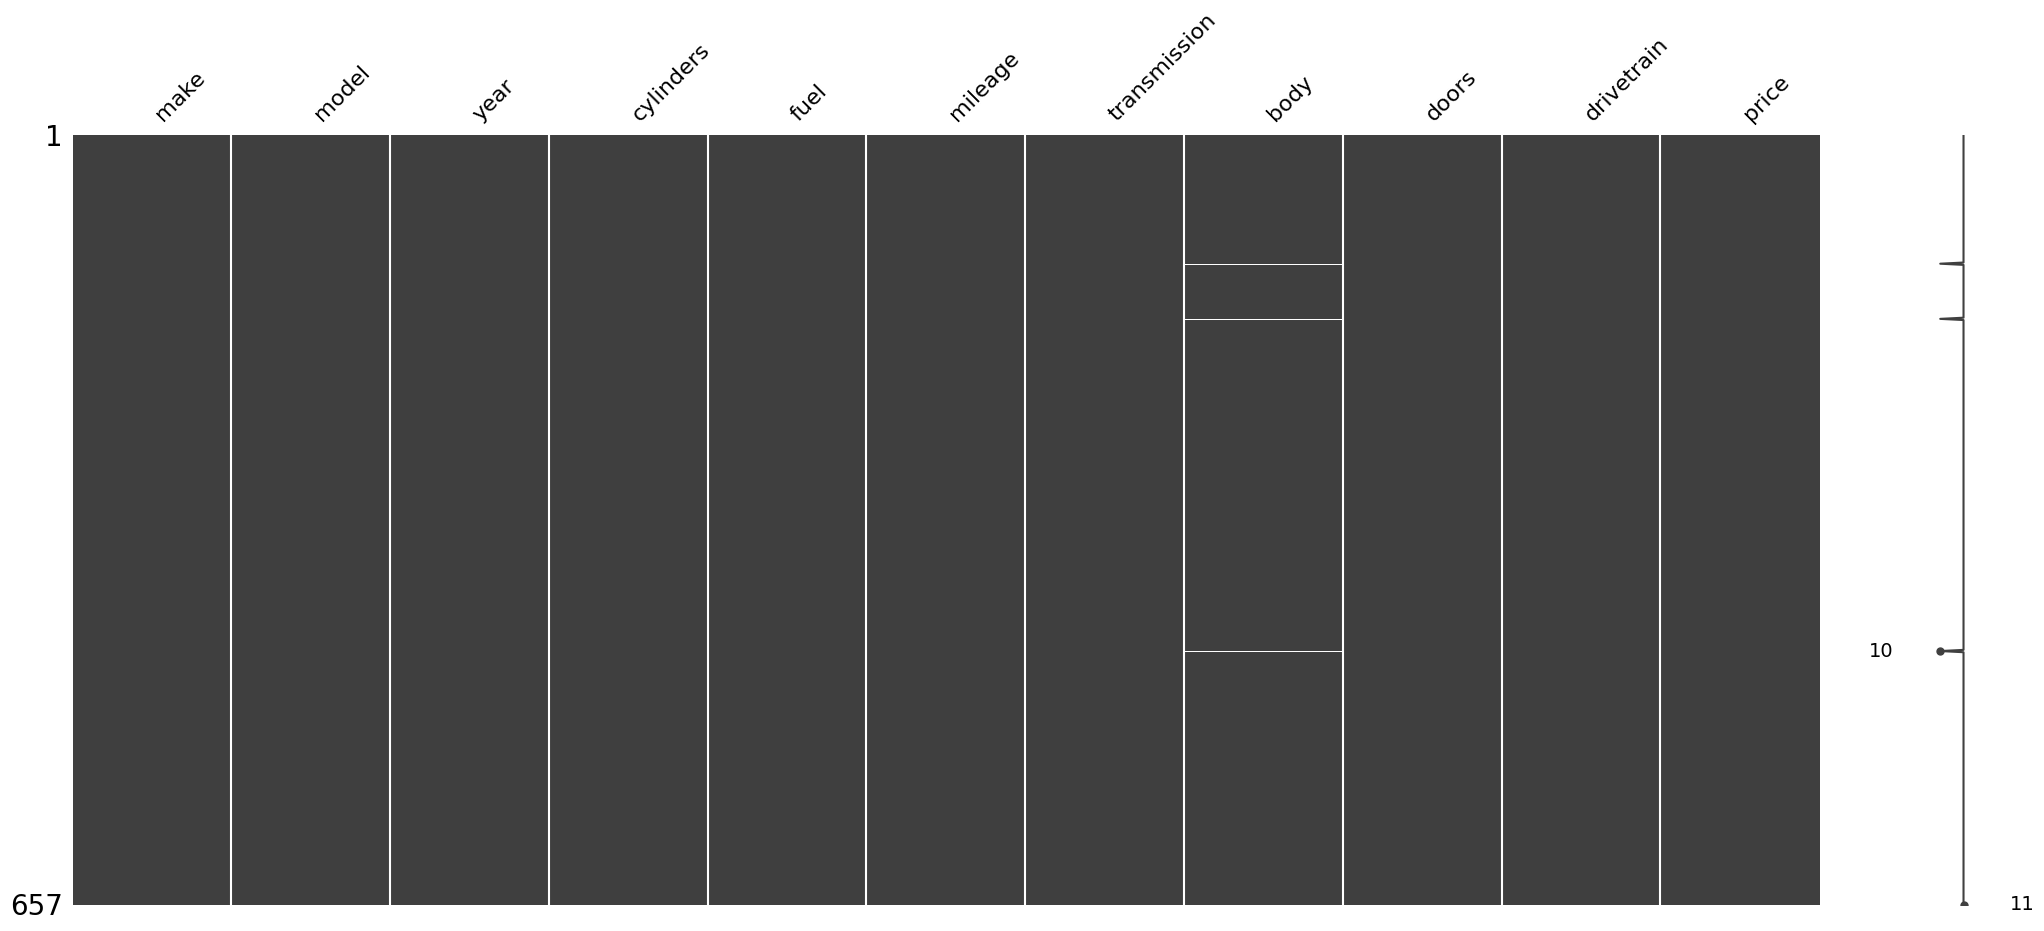


Missing values:
 body    3
dtype: int64


In [16]:
import missingno as msno
msno.matrix(refined_data)
plt.show()

missing_counts = refined_data.isnull().sum()
print("\nMissing values:\n", missing_counts[missing_counts > 0])


#### Removing the Missing Values

We handle missing values by dropping all rows containing null entries to ensure the dataset is clean and ready for model training.


In [17]:
refined_data = refined_data.dropna()
print(f"After removing missing values, dataset shape: {refined_data.shape}")


After removing missing values, dataset shape: (654, 11)


## Data Encoding

We apply encoding techniques to convert categorical features into numerical values. Label Encoding is used for high-cardinality features like `make` and `model`, while One-Hot Encoding is applied to other categorical features to prepare the data for machine learning models.


In [18]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for high-cardinality features
label_encoders = {}
for col in ['make', 'model']:
    le = LabelEncoder()
    refined_data[col] = le.fit_transform(refined_data[col])
    label_encoders[col] = le

# One-Hot Encoding for other categorical features
refined_data = pd.get_dummies(refined_data, columns=['fuel', 'transmission', 'body', 'drivetrain'], drop_first=True)

print(f"After encoding, dataset shape: {refined_data.shape}")
refined_data.head()


After encoding, dataset shape: (654, 48)


,make,model,year,cylinders,mileage,doors,price,fuel_Diesel (B20 capable),fuel_Gasoline,fuel_Hybrid,...,transmission_CVT with Xtronic,transmission_Variable,transmission_automatic w/paddle shifters,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,13,89,2024,6.0,10.0,4.0,74600.0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,13,35,2024,6.0,1.0,4.0,50170.0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
4,21,1,2024,6.0,10.0,4.0,81663.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6,13,89,2024,6.0,5.0,4.0,63862.0,False,True,False,...,False,False,False,False,False,True,False,False,False,True
7,8,30,2024,8.0,15.0,4.0,89978.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False


### Scaling the Data

We apply standard scaling to numerical features to normalize their values. This ensures that features with different units and scales contribute equally to the model's learning process.


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ['year', 'cylinders', 'mileage', 'doors']

refined_data[scaled_features] = scaler.fit_transform(refined_data[scaled_features])

refined_data.head()


,make,model,year,cylinders,mileage,doors,price,fuel_Diesel (B20 capable),fuel_Gasoline,fuel_Hybrid,...,transmission_CVT with Xtronic,transmission_Variable,transmission_automatic w/paddle shifters,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,13,89,0.0,1.017131,0.439009,0.0,74600.0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,13,35,0.0,1.017131,-1.116684,0.0,50170.0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
4,21,1,0.0,1.017131,0.439009,0.0,81663.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6,13,89,0.0,1.017131,-0.425265,0.0,63862.0,False,True,False,...,False,False,False,False,False,True,False,False,False,True
7,8,30,0.0,2.641559,1.303282,0.0,89978.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False


### Splitting the Dataset into Training and Testing

We split the refined dataset into training and testing sets to train the model on one portion of the data and evaluate its performance on unseen data.


In [20]:
from sklearn.model_selection import train_test_split

X = refined_data.drop('price', axis=1)
y = refined_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (523, 47), Test shape: (131, 47)


### Model Training

In this section, we implemented various machine learning models to predict vehicle prices based on the refined dataset. Each model was trained on the training set and evaluated using metrics such as R² Score and RMSE to measure accuracy and error.

----

#### Linear Regression Model

We trained a Linear Regression model on the training data to predict vehicle prices. After training, we evaluated the model using R² Score and RMSE to check its performance.


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R² Score: 0.6999432645080267
RMSE: 9086.25498441255


#### Random Forest Regressor
We implemented a Random Forest Regressor to capture non-linear relationships and improve prediction accuracy through ensemble learning.

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting
rf_pred = rf_model.predict(X_test)

# Evaluating
print("Random Forest R² Score:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", root_mean_squared_error(y_test, rf_pred ))


Random Forest R² Score: 0.8411390300244685
Random Forest RMSE: 6611.375667588044


#### Gradient Boosting Regressor
We applied Gradient Boosting Regressor to sequentially build an ensemble of weak learners and enhance predictive power.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Training the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting
gb_pred = gb_model.predict(X_test)

# Evaluating
print("Gradient Boosting R² Score:", r2_score(y_test, gb_pred))
print("Gradient Boosting RMSE:",root_mean_squared_error(y_test, gb_pred ))


Gradient Boosting R² Score: 0.8612705586415624
Gradient Boosting RMSE: 6178.279461817465


#### Hyperparameter Tuning of Gradient Boosting
We performed hyperparameter tuning on the Gradient Boosting Regressor using GridSearchCV to find the optimal parameters for maximizing model performance.

In [24]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

# Grid search
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best R² Score: 0.8370377417107221


### Tuned Gradient Boosting Regressor
We retrained the Gradient Boosting model with the best-found hyperparameters to achieve improved accuracy and reduced error.

In [25]:
best_gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

best_gb_model.fit(X_train, y_train)

# Predicting
best_gb_pred = best_gb_model.predict(X_test)

# Evaluating
print("Tuned Gradient Boosting R² Score:", r2_score(y_test, best_gb_pred))
print("Tuned Gradient Boosting RMSE:", root_mean_squared_error(y_test, best_gb_pred ))


Tuned Gradient Boosting R² Score: 0.8664434493885856
Tuned Gradient Boosting RMSE: 6061.998534952339


### Advance Models
In this section, we explore more sophisticated models like CatBoost and Stacking Regressor to enhance prediction accuracy and compare their performance with previously trained models.

---

#### CatBoost
We implemented the CatBoost Regressor, which is highly effective for categorical data and often provides superior performance with minimal tuning.



In [26]:
from catboost import CatBoostRegressor

# Training
cat_model = CatBoostRegressor(
    iterations=500, 
    learning_rate=0.1, 
    depth=6, 
    verbose=False, 
    random_state=42
)
cat_model.fit(X_train, y_train)

# Predicting
cat_pred = cat_model.predict(X_test)

# Evaluating
print("CatBoost R² Score:", r2_score(y_test, cat_pred))
print("CatBoost RMSE:", root_mean_squared_error(y_test, cat_pred ))


CatBoost R² Score: 0.8634062515174936
CatBoost RMSE: 6130.538748736796


#### Stacking Regressor
We used a Stacking Regressor, combining predictions from multiple models (Random Forest and Gradient Boosting) with a final Linear Regression to improve accuracy.



In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Training
stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train, y_train)

# Predicting
stack_pred = stack_model.predict(X_test)

# Evaluating
print("Stacking Regressor R² Score:", r2_score(y_test, stack_pred))
print("Stacking Regressor RMSE:", root_mean_squared_error(y_test, stack_pred ))


Stacking Regressor R² Score: 0.8611639101696342
Stacking Regressor RMSE: 6180.653786519452


### Comparing All the Models
After training multiple models, we compile their evaluation metrics to compare performance.
This helps identify which model achieves the best balance between accuracy (R² Score) and error (RMSE).

In [28]:
# Collect results
results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting',
        'Tuned Gradient Boosting',
        'CatBoost',
        'Stacking Regressor'
    ],
    'R² Score': [
        r2_score(y_test, y_pred),          # Linear Regression
        r2_score(y_test, rf_pred),         # Random Forest
        r2_score(y_test, gb_pred),         # Gradient Boosting
        r2_score(y_test, best_gb_pred),    # Tuned Gradient Boosting
        r2_score(y_test, cat_pred),        # CatBoost
        r2_score(y_test, stack_pred)       # Stacking Regressor
    ],
    'RMSE': [
        root_mean_squared_error(y_test, y_pred),
        root_mean_squared_error(y_test, rf_pred),
        root_mean_squared_error(y_test, gb_pred),
        root_mean_squared_error(y_test, best_gb_pred),
        root_mean_squared_error(y_test, cat_pred),
        root_mean_squared_error(y_test, stack_pred)
    ]
})


# Show results
results.sort_values(by='R² Score', ascending=False).reset_index(drop=True)


,Model,R² Score,RMSE
0,Tuned Gradient Boosting,0.866443,6061.998535
1,CatBoost,0.863406,6130.538749
2,Gradient Boosting,0.861271,6178.279462
3,Stacking Regressor,0.861164,6180.653787
4,Random Forest,0.841139,6611.375668
5,Linear Regression,0.699943,9086.254984


/var/folders/wv/jwbv3h4s56j81f_b9w5yvc2m0000gn/T/ipykernel_20048/370524376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results, palette='viridis')


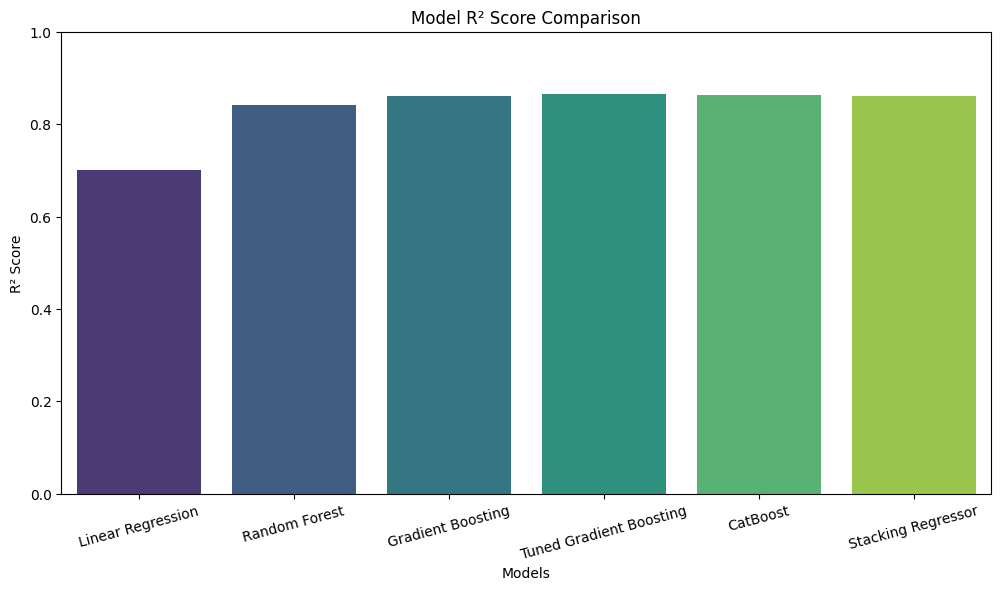

/var/folders/wv/jwbv3h4s56j81f_b9w5yvc2m0000gn/T/ipykernel_20048/370524376.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results, palette='magma')


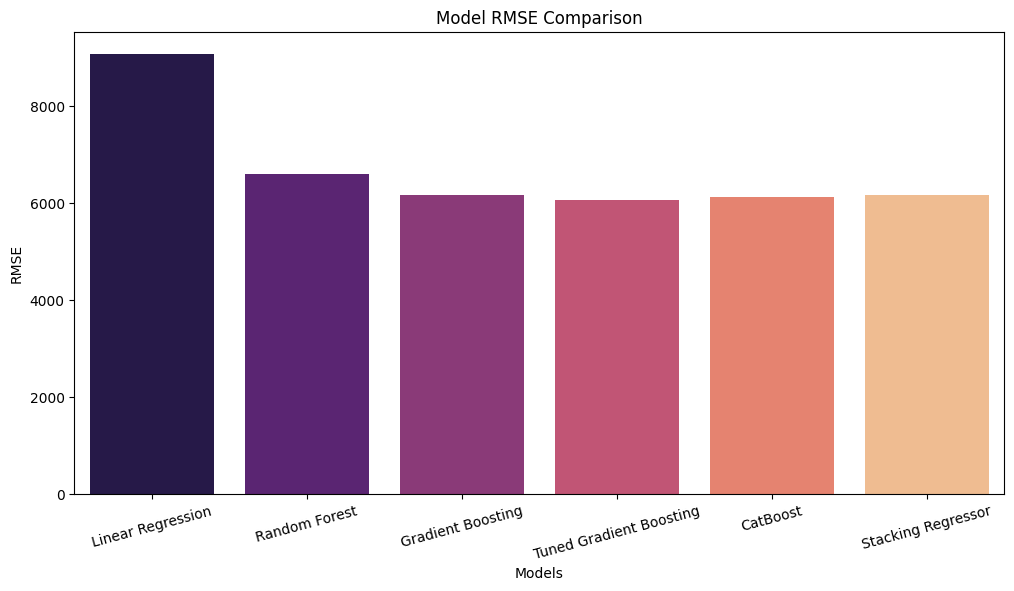

In [29]:
# Plot R² Score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results, palette='viridis')
plt.title('Model R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


# Plot RMSE comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=results, palette='magma')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.show()


### Testing the Tuned Gradient Boost
Here, we test the best Gradient Boosting model after hyperparameter tuning to evaluate its final performance on the test data.

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict on test set
tuned_gb_predictions = best_gb_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, tuned_gb_predictions)
rmse = mean_squared_error(y_test, tuned_gb_predictions)
mae = mean_absolute_error(y_test, tuned_gb_predictions)

print(f"Tuned Gradient Boosting R² Score: {r2:.4f}")
print(f"Tuned Gradient Boosting RMSE: {rmse:.2f}")
print(f"Tuned Gradient Boosting MAE: {mae:.2f}")


Tuned Gradient Boosting R² Score: 0.8664
Tuned Gradient Boosting RMSE: 36747826.24
Tuned Gradient Boosting MAE: 4414.03


#### Actual vs Predicted Prices Visualization
This plot helps visualize how well the tuned Gradient Boosting model's predictions align with the actual vehicle prices.

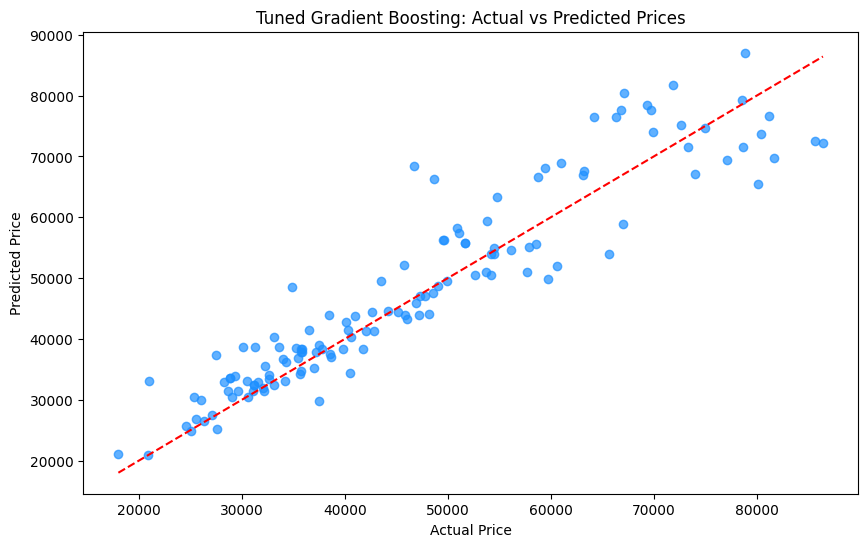

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tuned_gb_predictions, alpha=0.7, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Tuned Gradient Boosting: Actual vs Predicted Prices')
plt.show()


#### Error Distribution
This histogram visualizes the distribution of prediction errors (actual minus predicted prices) to check how errors are spread across the dataset.

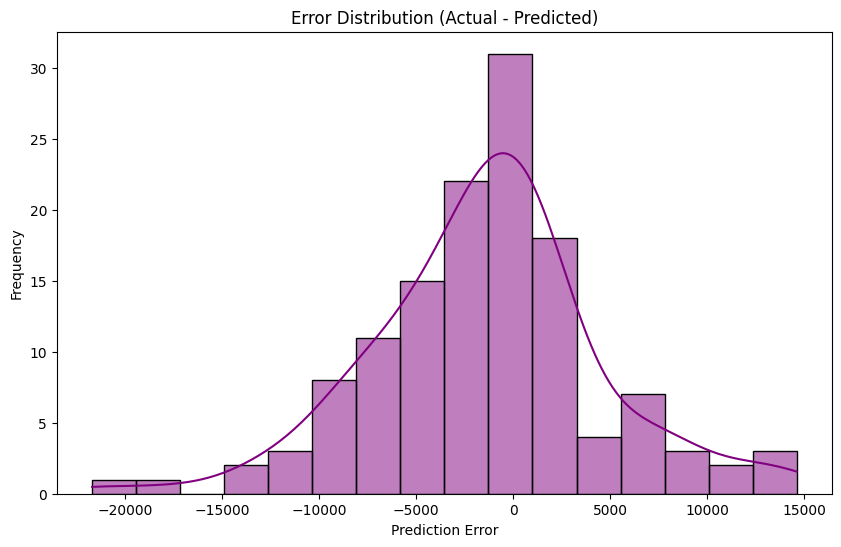

In [32]:
errors = y_test - tuned_gb_predictions

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='purple')
plt.title('Error Distribution (Actual - Predicted)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()
